# 🚴‍♂️ Análisis de Datos – Clientes Potenciales (*Bikebuyer*)

Este notebook presenta un análisis del dataset `BikeBuyer`, con foco en la **limpieza**, **transformación** y **análisis exploratorio de datos (EDA)**. Además, se responden una serie de preguntas orientadas a comprender mejor el perfil de los compradores de bicicletas.

## 🎯 Objetivo

El objetivo de este notebook es **preparar y explorar el dataset BikeBuyer** para dejarlo en condiciones óptimas para análisis posteriores o modelos de machine learning. Esto incluye:

- Realizar una limpieza profunda de los datos (valores nulos, columnas irrelevantes).
- Transformar variables para facilitar el análisis (como edad, educación u ocupación).
- Explorar patrones y relaciones entre variables clave.
- Guiar el análisis mediante preguntas exploratorias enfocadas en entender qué caracteriza a los compradores de bicicletas (0 Compra, 1 No compra).

In [3]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
pd.options.display.max_columns = None

In [ ]:
# Carga y muestra del dataset 
df = pd.read_excel("data-bikebuyer.xlsx")
df.head()

,CustomerKey,GeographyKey,CustomerAlternateKey,Title,FirstName,MiddleName,LastName,NameStyle,BirthDate,MaritalStatus,Suffix,Gender,EmailAddress,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,SpanishEducation,FrenchEducation,EnglishOccupation,SpanishOccupation,FrenchOccupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,AddressLine2,Phone,DateFirstPurchase,CommuteDistance,Region,BikeBuyer
0,11000,26,AW00011000,NaN,Jon,V,Yang,0,1986-10-06,M,NaN,M,jon24@adventure-works.com,90000,2,0,Bachelors,Licenciatura,Bac + 4,Professional,Profesional,Cadre,1,0,3761 N. 14th St,NaN,1 (11) 500 555-0162,2011-01-19,1-2 Miles,Pacific,1
1,11001,37,AW00011001,NaN,Eugene,L,Huang,0,1991-05-10,S,NaN,M,eugene10@adventure-works.com,60000,3,3,Bachelors,Licenciatura,Bac + 4,Professional,Profesional,Cadre,0,1,2243 W St.,NaN,1 (11) 500 555-0110,2011-01-15,0-1 Miles,Pacific,1
2,11002,31,AW00011002,NaN,Ruben,NaN,Torres,0,1986-02-09,M,NaN,M,ruben35@adventure-works.com,60000,3,3,Bachelors,Licenciatura,Bac + 4,Professional,Profesional,Cadre,1,1,5844 Linden Land,NaN,1 (11) 500 555-0184,2011-01-07,2-5 Miles,Pacific,1
3,11003,11,AW00011003,NaN,Christy,NaN,Zhu,0,1988-08-14,S,NaN,F,christy12@adventure-works.com,70000,0,0,Bachelors,Licenciatura,Bac + 4,Professional,Profesional,Cadre,0,1,1825 Village Pl.,NaN,1 (11) 500 555-0162,2010-12-29,5-10 Miles,Pacific,1
4,11004,19,AW00011004,NaN,Elizabeth,NaN,Johnson,0,1994-08-05,S,NaN,F,elizabeth5@adventure-works.com,80000,5,5,Bachelors,Licenciatura,Bac + 4,Professional,Profesional,Cadre,1,4,7553 Harness Circle,NaN,1 (11) 500 555-0131,2011-01-23,1-2 Miles,Pacific,1


## 🔍 Exploración Inicial

In [5]:
# Tamaño del dataset
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")

Filas: 18484, Columnas: 31


In [6]:
# Información general de columnas y tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerKey           18484 non-null  int64         
 1   GeographyKey          18484 non-null  int64         
 2   CustomerAlternateKey  18484 non-null  object        
 3   Title                 101 non-null    object        
 4   FirstName             18484 non-null  object        
 5   MiddleName            10654 non-null  object        
 6   LastName              18484 non-null  object        
 7   NameStyle             18484 non-null  int64         
 8   BirthDate             18484 non-null  datetime64[ns]
 9   MaritalStatus         18484 non-null  object        
 10  Suffix                3 non-null      object        
 11  Gender                18484 non-null  object        
 12  EmailAddress          18484 non-null  object        
 13  YearlyIncome    

In [7]:
# Estadísticas básicas de columnas numéricas
df.describe()

,CustomerKey,GeographyKey,NameStyle,BirthDate,YearlyIncome,TotalChildren,NumberChildrenAtHome,HouseOwnerFlag,NumberCarsOwned,DateFirstPurchase,BikeBuyer
count,18484.000000,18484.000000,18484.0,18484,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484,18484.000000
mean,20241.500000,257.956287,0.0,1984-04-28 10:44:11.893529536,57305.777970,1.844352,1.004058,0.676369,1.502705,2013-02-15 06:10:59.078121472,0.494049
min,11000.000000,2.000000,0.0,1931-02-10 00:00:00,10000.000000,0.000000,0.000000,0.000000,0.000000,2010-12-29 00:00:00,0.000000
25%,15620.750000,62.000000,0.0,1976-10-06 00:00:00,30000.000000,0.000000,0.000000,0.000000,1.000000,2012-10-12 00:00:00,0.000000
50%,20241.500000,240.000000,0.0,1986-07-13 00:00:00,60000.000000,2.000000,0.000000,1.000000,2.000000,2013-05-04 00:00:00,0.000000
75%,24862.250000,345.000000,0.0,1993-08-31 00:00:00,70000.000000,3.000000,2.000000,1.000000,2.000000,2013-09-10 00:00:00,1.000000
max,29483.000000,654.000000,0.0,2001-06-25 00:00:00,170000.000000,5.000000,5.000000,1.000000,4.000000,2014-01-28 00:00:00,1.000000
std,5336.015523,196.531062,0.0,NaN,32285.841703,1.612408,1.522660,0.467874,1.138394,NaN,0.499978


## ❌ Tratamiento de Valores Faltantes

In [8]:
valores_faltantes = df.isnull().sum()
valores_faltantes[valores_faltantes > 0]

Title           18383
MiddleName       7830
Suffix          18481
AddressLine2    18172
dtype: int64

> 📌 Acción tomada: Eliminar columnas con muchos nulos o sin valor informativo.

In [9]:
cols_a_eliminar = [
    'Title', 'MiddleName', 'Suffix', 'AddressLine2', 
    'CustomerKey', 'GeographyKey', 'CustomerAlternateKey',
    'FirstName', 'LastName', 'NameStyle', 'EmailAddress', 
    'AddressLine1', 'Phone', 'DateFirstPurchase'
]

df.drop(columns=cols_a_eliminar, inplace=True)

## 🧠 Transformación de Datos

In [10]:
# Crear variable "Edad"
df['Age'] = pd.to_datetime('today').year - pd.to_datetime(df['BirthDate']).dt.year
df.drop(columns=['BirthDate'], inplace=True)

# Consolidar columnas multilingües
df['Education'] = df[['EnglishEducation', 'SpanishEducation', 'FrenchEducation']].bfill(axis=1).iloc[:, 0]
df.drop(columns=['EnglishEducation', 'SpanishEducation', 'FrenchEducation'], inplace=True)

df['Occupation'] = df[['EnglishOccupation', 'SpanishOccupation', 'FrenchOccupation']].bfill(axis=1).iloc[:, 0]
df.drop(columns=['EnglishOccupation', 'SpanishOccupation', 'FrenchOccupation'], inplace=True)

## 📊 Análisis Exploratorio de Datos (EDA)

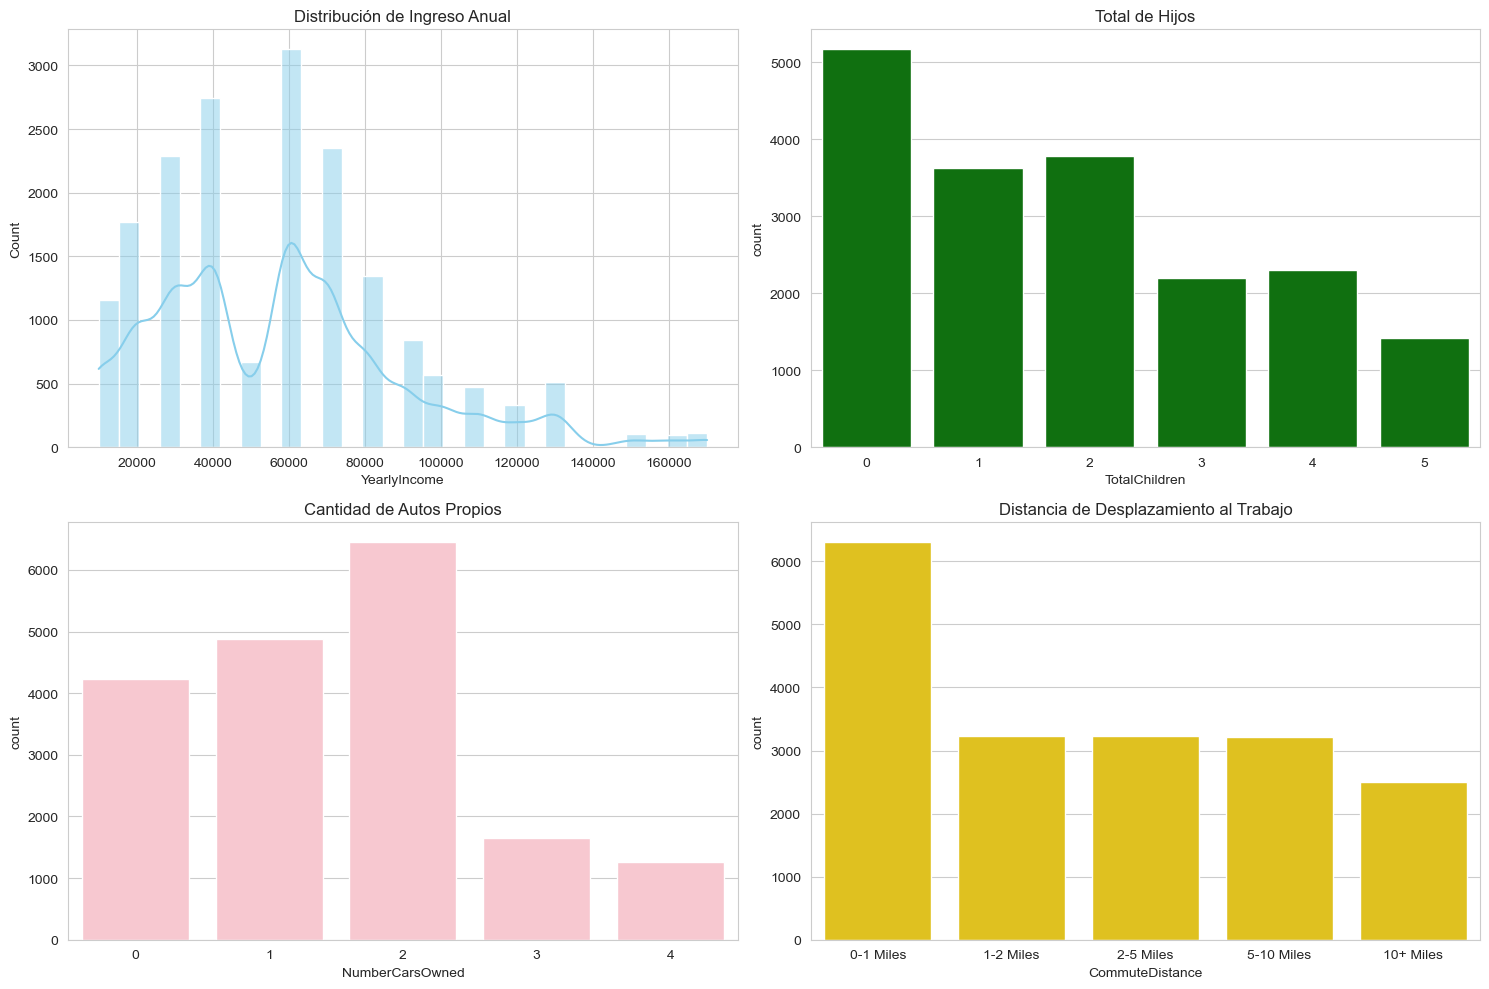

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(ax=axes[0, 0], x='YearlyIncome', data=df, color='skyblue', bins=30, kde=True)
axes[0, 0].set_title('Distribución de Ingreso Anual')

sns.countplot(ax=axes[0, 1], x='TotalChildren', data=df, color='green')
axes[0, 1].set_title('Total de Hijos')

sns.countplot(ax=axes[1, 0], x='NumberCarsOwned', data=df, color='pink')
axes[1, 0].set_title('Cantidad de Autos Propios')

sns.countplot(ax=axes[1, 1], x='CommuteDistance', data=df, color='gold',
            order=['0-1 Miles', '1-2 Miles', '2-5 Miles', '5-10 Miles', '10+ Miles'])
axes[1, 1].set_title('Distancia de Desplazamiento al Trabajo')

plt.tight_layout()
plt.show()

- Ingreso Anual: La mayoría de los clientes tiene un ingreso anual entre 20,000 y 70,000, con un pico notable alrededor de 60,000. La distribución parece estar sesgada hacia la derecha, indicando que hay algunos clientes con ingresos significativamente más altos, aunque son menos comunes.

- Número Total de Hijos: La mayoría de los clientes no tiene hijos (0 hijos), seguido por aquellos que tienen 1 o 2 hijos. A medida que aumenta el número de hijos, la cantidad de clientes disminuye, lo cual sugiere que tener más de 2 hijos es menos frecuente entre los clientes.

- Número de Autos Propios: La distribución muestra que la mayoría de los clientes posee entre 1 y 2 autos, siendo 2 autos la cantidad más común. Muy pocos clientes poseen 3 o más autos, y una cantidad significativa no posee autos propios.

- Distancia de Distancia Desplazamiento: La mayoría de los clientes vive a una distancia corta de su lugar de trabajo (0-1 millas). Las demás distancias son menos comunes, lo que indica que la mayoría de los clientes reside relativamente cerca de su trabajo.

## ❓ Análisis Dirigido por Preguntas

A continuación, se responde a algunas preguntas clave para entender el comportamiento de los clientes respecto a la compra de bicicletas.

### 1. ¿Cuál es la edad promedio de los compradores y no compradores?

In [12]:
df.groupby('BikeBuyer')['Age'].mean()

BikeBuyer
0    42.378743
1    39.945357
Name: Age, dtype: float64

> Los no compradores de bicicletas tienen en promedio una edad ligeramente menor (≈ 39.9 años) que los compradores (≈ 42.4 años), lo cual podría indicar una tendencia de compra más alta en clientes mayores.

### 2. ¿Qué relación hay entre ingreso anual y compra de bicicleta?

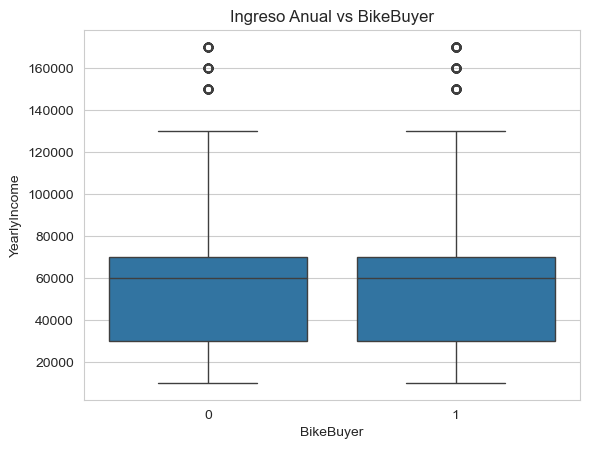

In [13]:
sns.boxplot(data=df, x='BikeBuyer', y='YearlyIncome')
plt.title('Ingreso Anual vs BikeBuyer')
plt.show()

> El diagrama de caja sugiere que no hay una diferencia drástica en los ingresos anuales entre compradores y no compradores.

### 3. ¿Hay alguna tendencia entre cantidad de hijos y ser comprador?

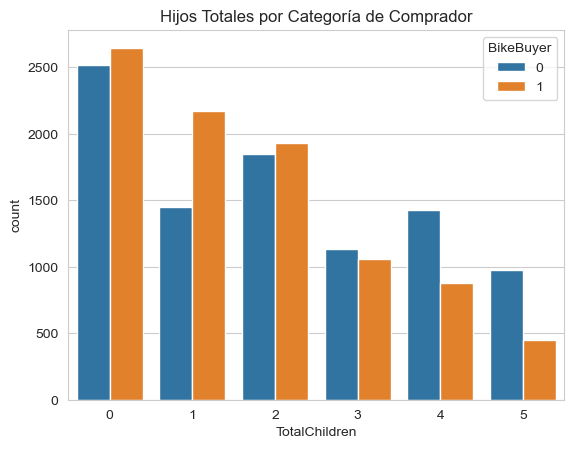

In [14]:
sns.countplot(data=df, x='TotalChildren', hue='BikeBuyer')
plt.title('Hijos Totales por Categoría de Comprador')
plt.show()

> Se observa que los clientes con 0 o 1 hijo son más propensos a comprar bicicletas. A medida que aumenta la cantidad de hijos, la proporción de compradores tiende a disminuir.

### 4. ¿Los compradores tienen más autos que los no compradores?

In [15]:
df.groupby('BikeBuyer')['NumberCarsOwned'].mean()

BikeBuyer
0    1.706159
1    1.294350
Name: NumberCarsOwned, dtype: float64

> En promedio, los compradores poseen una cantidad ligeramente mayor de autos que los no compradores. Esto puede indicar cierta correlación entre mayor poder adquisitivo (más autos) y la compra de bicicletas.